       likes_count                                               link
month                                                                
1            20269  https://www.facebook.com/notes/%E4%B8%AD%E8%8F...
2            96099  https://www.youtube.com/watch?v=tqkvVCaK8ao&fe...
3            28720   https://www.facebook.com/events/446195088866200/
4            63174  https://www.facebook.com/chtmobile/videos/1118...
5            47928  https://www.facebook.com/chtmobile/videos/4659...
6            24435               https://www.ippawards.com/index.html
7            83169   https://www.facebook.com/events/446195088866200/
8            61337  https://www.facebook.com/chtmobile/videos/1190...
9            27585   https://www.facebook.com/events/899452360135257/
10           40635  https://www.youtube.com/watch?v=jCWjH-wya5k&li...
11           33731  https://www.facebook.com/chtmobile/videos/1241...
12           50330  https://www.facebook.com/hamimusichit/photos/a...
       likes_count
m

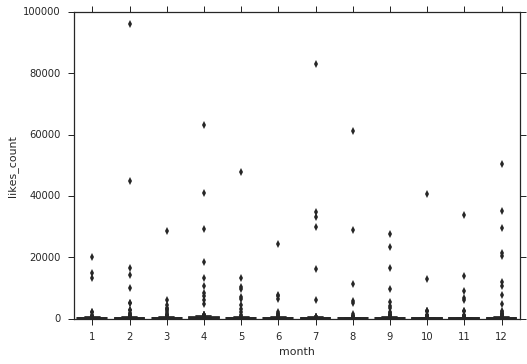

In [86]:
%matplotlib inline

import pyes
import json
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

host = '140.118.126.237:9200'

fid_FAR = '162583067088337'
fid_CHT = '166459533383697'
fid_TWM = '1448357445384692'

def aa(fid):
    data = []
    conn = pyes.es.ES(host)
    tq = pyes.query.TermQuery(field="fid", value=fid)
    qsearch = pyes.query.Search(tq) 
    result = conn.search(query=qsearch , indices='facebook_nested' , doc_types='post',sort='likes_count:desc',)
    index = 0
    for i in result:
        if not i.get('link'):
            i['link'] = "None"
        datemonth = datetime.strptime(i['created_time'], "%Y-%m-%dT%H:%M:%S+%f").month 
#        print i['link']
#        print str(i['likes_count']) + ',' + str(datemonth) +','+i['id']%%
        data.append([i['likes_count'],i['link'],datemonth])
        index += 1  
#    print data
    df=pd.DataFrame(data,columns={'likes_count','link','month'})
#    print df
    print df.groupby(['month']).max()
    print df.groupby(['month']).mean()
    sns.set(style="ticks")
    sns_plot=sns.boxplot(x="month", y="likes_count", data=df, palette="PRGn")

    
    
aa(fid_CHT)


       likes_count                                               link
month                                                                
1            16108        https://www.youtube.com/watch?v=s3cJ45NIjsU
2            18560  https://www.facebook.com/safetycheck/taiwanear...
3            15936  https://www.facebook.com/fareastone/videos/980...
4            19647  https://www.youtube.com/watch?v=JK5IBNyKWn0&li...
5            31947  https://www.youtube.com/watch?v=S1pwS5Fypx4&fe...
6            15368  https://www.facebook.com/fareastone/videos/817...
7            17699  https://www.facebook.com/fareastone/videos/337...
8            13957  https://www.facebook.com/fareastone/videos/518...
9            45574  https://www.youtube.com/watch?feature=player_e...
10           23833  https://www.facebook.com/fareastone/photos/a.1...
11           41100  https://www.youtube.com/watch?v=5QjzvN5rTeo&fe...
12           25950        https://www.youtube.com/watch?v=RZWseKd6ems
       likes_count
m

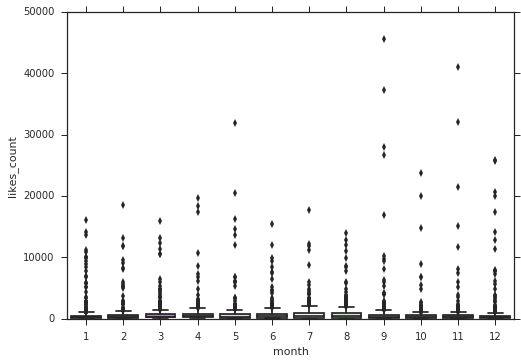

In [87]:
aa(fid_FAR)

       likes_count                                               link
month                                                                
1            17607  https://www.facebook.com/taiwanmobile/videos/1...
2            19060        https://www.youtube.com/watch?v=rPLiGyWy5bQ
3              376        https://www.youtube.com/watch?v=4ViwSeuWVfE
4              322  https://www.youtube.com/watch?v=L6lKvogzFK0&fe...
5            10926  https://www.youtube.com/watch?v=pRbbePM_A3Y&fe...
6            88655                       https://youtu.be/HsMbMr5qTfg
7             3795  https://www.youtube.com/watch?v=PWa70T2yz2E&fe...
8             3893        https://www.youtube.com/watch?v=nm0cGIavUmU
9             6373  https://www.taiwanmobile.com/events/Mobile_New...
10            2522        https://www.youtube.com/watch?v=3XNwKoD5mQg
11             944  https://www.taiwanmobile.com/content/event/TW_...
12           17782        https://www.youtube.com/watch?v=lkaIoH6Um60
       likes_count
m

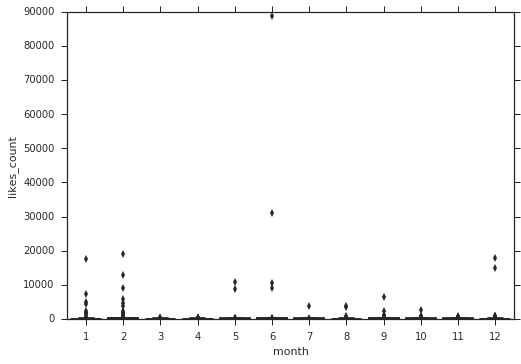

In [89]:
aa(fid_TWM)